<a href="https://colab.research.google.com/github/shashwatdixit10/Fraud-Detection-ML/blob/main/ML%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd

In [29]:
data = pd.read_csv('//content/drive/MyDrive/data/Fraud Analytics Dataset.csv')

In [30]:
import numpy as np

In [31]:
data.head()

,txn_id,dt_txn_comp,txn_comp_time,txn_type,txn_subtype,initiating_channel_id,txn_status,error_code,payer_psp,payee_psp,...,remitter_mcc_code,custref_transaction_ref,cred_type,cred_subtype,payer_app_id,payee_app_id,initiation_mode,dt_time_txn_compl,time_of_day,@dropdown
0,436,2023-08-11,12:00:00 AM,Refund,Product Refund,4,Successful,NaN,Amazon Pay,BharatPe (for UPI and QR code payments),...,6051,Reference 324,Debit Card,Prepaid Debit Card,BHIM Union Bank UPI App,AmazonPay,18,2023-08-11 0:00,Night,NaN
1,665,2021-10-17,12:00:00 AM,Payment,Peer-to-Peer (P2P),16,Successful,NaN,ICICI iMobile,Square (for international transactions),...,5966,Reference 550,Overdraft,Business Overdraft,ESAF,BHIM Union Bank UPI App,18,2021-10-17 0:00,Night,NaN
2,726,2019-11-16,12:00:00 AM,Withdrawal,ATM Withdrawal,3,Successful,NaN,Axis Pay,PhonePe for Merchants,...,5047,Reference 611,Auto Loan,Used Car Loan,ICICI iMobile,BHIM Indus Pay,16,2019-11-16 0:00,Night,NaN
3,842,2023-09-05,12:00:00 AM,Transfer,Inter-bank Transfer,0,Successful,NaN,MobiKwik,ICICI Merchant Services,...,822,Reference 729,Overdraft,Personal Overdraft,BHIM UPI APP,JusPay Technologies,2,2023-09-05 0:00,Night,NaN
4,2202,2021-09-18,12:00:00 AM,Fee,Account Maintenance Fee,1,Successful,NaN,MasterCard,BharatPe (for UPI and QR code payments),...,5978,Reference 2068,Personal Loan,Unsecured Personal Loan,PREPAIDICICI,Cred,1,2021-09-18 0:00,Night,NaN


In [32]:
data['txn_subtype'].value_counts()

txn_subtype
Service Refund                  3675
Inter-bank Transfer             3672
Merchant Payment                3648
Bill Payment                    3612
Product Refund                  3603
Fraudulent Transaction          3585
Peer-to-Peer (P2P)              3546
Intra-bank Transfer             3546
Account Maintenance Fee         3537
ATM Withdrawal                  3510
Transaction Fee                 3507
Cash Deposit                    3486
Transaction Error Correction    3468
Cheque Deposit                  3420
Branch Withdrawal               3375
International Transfer          2481
Name: count, dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55671 entries, 0 to 55670
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   txn_id                   55671 non-null  int64  
 1   dt_txn_comp              55671 non-null  object 
 2   txn_comp_time            55671 non-null  object 
 3   txn_type                 55671 non-null  object 
 4   txn_subtype              55671 non-null  object 
 5   initiating_channel_id    55671 non-null  int64  
 6   txn_status               55671 non-null  object 
 7   error_code               4903 non-null   object 
 8   payer_psp                55671 non-null  object 
 9   payee_psp                55671 non-null  object 
 10  remitter_bank            55671 non-null  object 
 11  beneficiary_bank         55671 non-null  object 
 12  payer_handle             55671 non-null  object 
 13  payer_app                55671 non-null  object 
 14  payee_handle          

In [34]:
data.isnull().sum()

txn_id                         0
dt_txn_comp                    0
txn_comp_time                  0
txn_type                       0
txn_subtype                    0
initiating_channel_id          0
txn_status                     0
error_code                 50768
payer_psp                      0
payee_psp                      0
remitter_bank                  0
beneficiary_bank               0
payer_handle                   0
payer_app                      0
payee_handle                   0
payee_app                      0
payee_requested_amount         0
payee_settlement_amount        0
payer_location                 0
payer_city                     0
payer_state                    0
payee_location                 0
payee_city                     0
payee_state                    0
payer_os_type                  0
payee_os_type                  0
beneficiary_mcc_code           0
remitter_mcc_code              0
custref_transaction_ref        0
cred_type                      0
cred_subty

In [35]:
data.shape

(55671, 37)

In [36]:
missing_values = data.isnull().sum()

In [37]:
print(missing_values)


txn_id                         0
dt_txn_comp                    0
txn_comp_time                  0
txn_type                       0
txn_subtype                    0
initiating_channel_id          0
txn_status                     0
error_code                 50768
payer_psp                      0
payee_psp                      0
remitter_bank                  0
beneficiary_bank               0
payer_handle                   0
payer_app                      0
payee_handle                   0
payee_app                      0
payee_requested_amount         0
payee_settlement_amount        0
payer_location                 0
payer_city                     0
payer_state                    0
payee_location                 0
payee_city                     0
payee_state                    0
payer_os_type                  0
payee_os_type                  0
beneficiary_mcc_code           0
remitter_mcc_code              0
custref_transaction_ref        0
cred_type                      0
cred_subty

In [38]:
if '@dropdown' in data.columns:                                           #this is how we drop columns
    data.drop(columns=['@dropdown'], inplace=True)

In [39]:
missing_values = data.isnull().sum()

In [40]:
print(missing_values)


txn_id                         0
dt_txn_comp                    0
txn_comp_time                  0
txn_type                       0
txn_subtype                    0
initiating_channel_id          0
txn_status                     0
error_code                 50768
payer_psp                      0
payee_psp                      0
remitter_bank                  0
beneficiary_bank               0
payer_handle                   0
payer_app                      0
payee_handle                   0
payee_app                      0
payee_requested_amount         0
payee_settlement_amount        0
payer_location                 0
payer_city                     0
payer_state                    0
payee_location                 0
payee_city                     0
payee_state                    0
payer_os_type                  0
payee_os_type                  0
beneficiary_mcc_code           0
remitter_mcc_code              0
custref_transaction_ref        0
cred_type                      0
cred_subty

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
subtype_counts = data['txn_subtype'].value_counts()

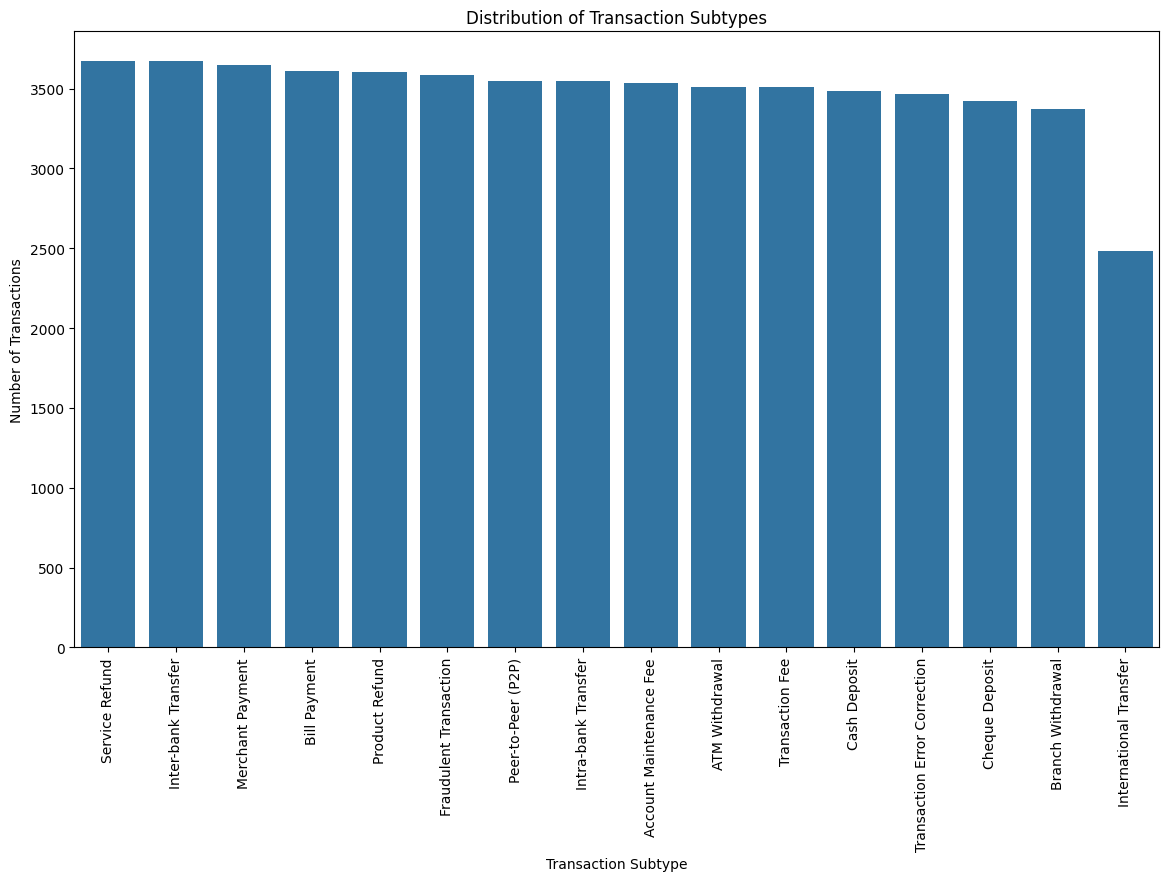

In [43]:
plt.figure(figsize=(14, 8))
sns.barplot(x=subtype_counts.index, y=subtype_counts.values)
plt.xlabel('Transaction Subtype')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transaction Subtypes')
plt.xticks(rotation=90)
plt.show()

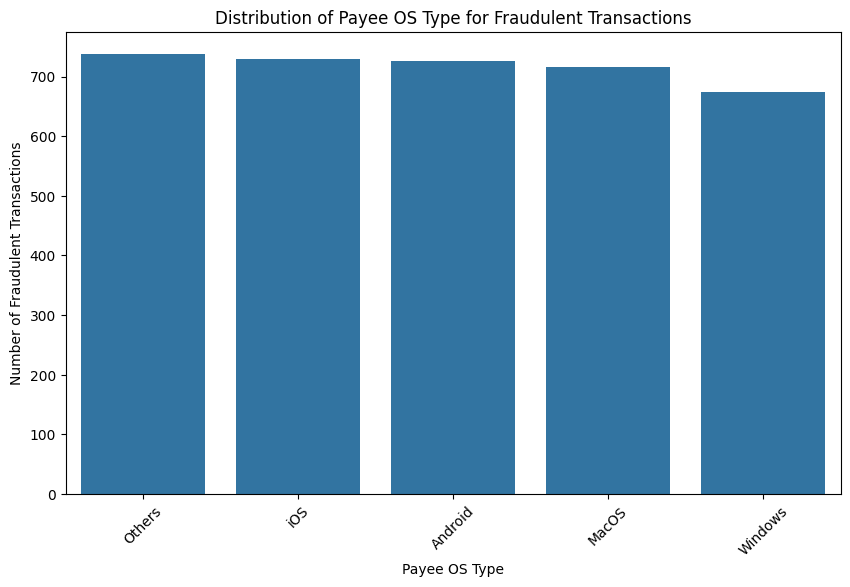

In [44]:
fraud_labels = ['Fraudulent Transaction']
data['is_fraud'] = data['txn_subtype'].apply(lambda x: 1 if x in fraud_labels else 0)

fraud_data = data[data['is_fraud'] == 1]

payee_os_counts = fraud_data['payee_os_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=payee_os_counts.index, y=payee_os_counts.values)
plt.xlabel('Payee OS Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Payee OS Type for Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

<ipython-input-45-c6d9e4174c2a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['txn_hour'] = pd.to_datetime(fraud_data['txn_comp_time'], format='%I:%M:%S %p').dt.hour


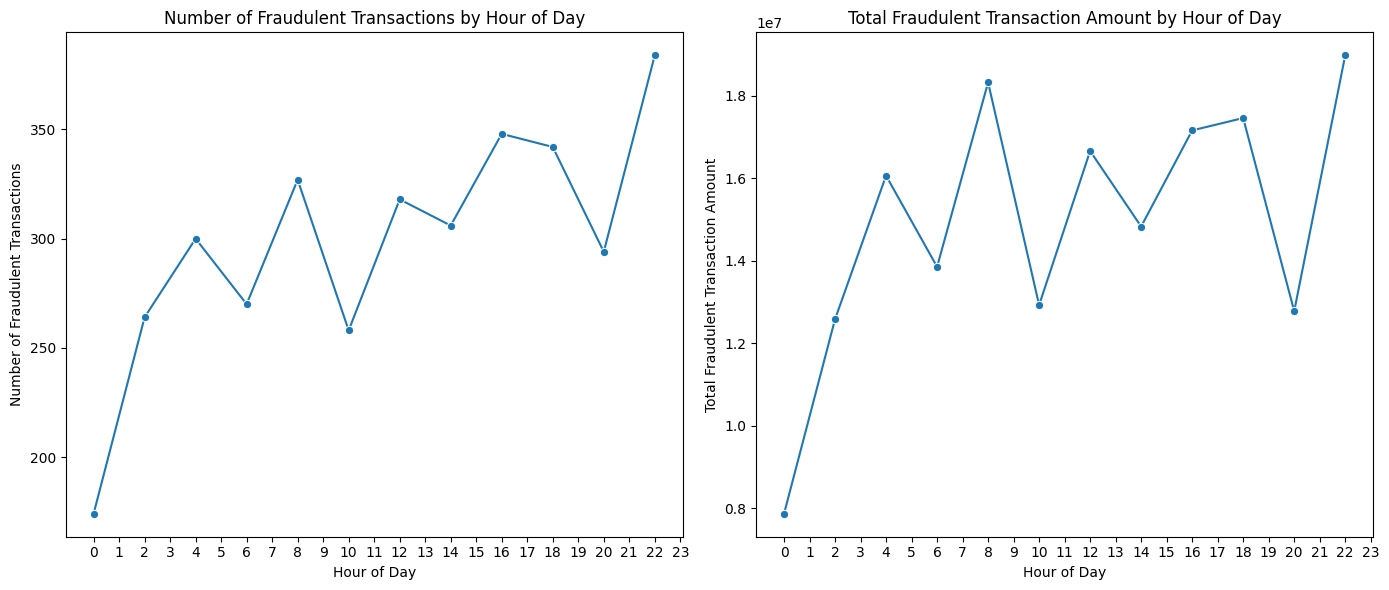

In [45]:
# Create target variable 'is_fraud'
fraud_labels = ['Fraudulent Transaction']
data['is_fraud'] = data['txn_subtype'].apply(lambda x: 1 if x in fraud_labels else 0)

fraud_data = data[data['is_fraud'] == 1]


fraud_data['txn_hour'] = pd.to_datetime(fraud_data['txn_comp_time'], format='%I:%M:%S %p').dt.hour


fraud_count_by_hour = fraud_data.groupby('txn_hour').size()


fraud_amount_by_hour = fraud_data.groupby('txn_hour')['payee_requested_amount'].sum()

# Plot the number of fraudulent transactions by hour
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=fraud_count_by_hour.index, y=fraud_count_by_hour.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions by Hour of Day')
plt.xticks(range(0, 24))

# Plot the total fraudulent transaction amount by hour
plt.subplot(1, 2, 2)
sns.lineplot(x=fraud_amount_by_hour.index, y=fraud_amount_by_hour.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Total Fraudulent Transaction Amount')
plt.title('Total Fraudulent Transaction Amount by Hour of Day')
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

In [46]:
fraud_data = data[data['txn_subtype']=='Fraudulent Transaction']

In [47]:
subtype_counts = fraud_data['payee_state'].value_counts()

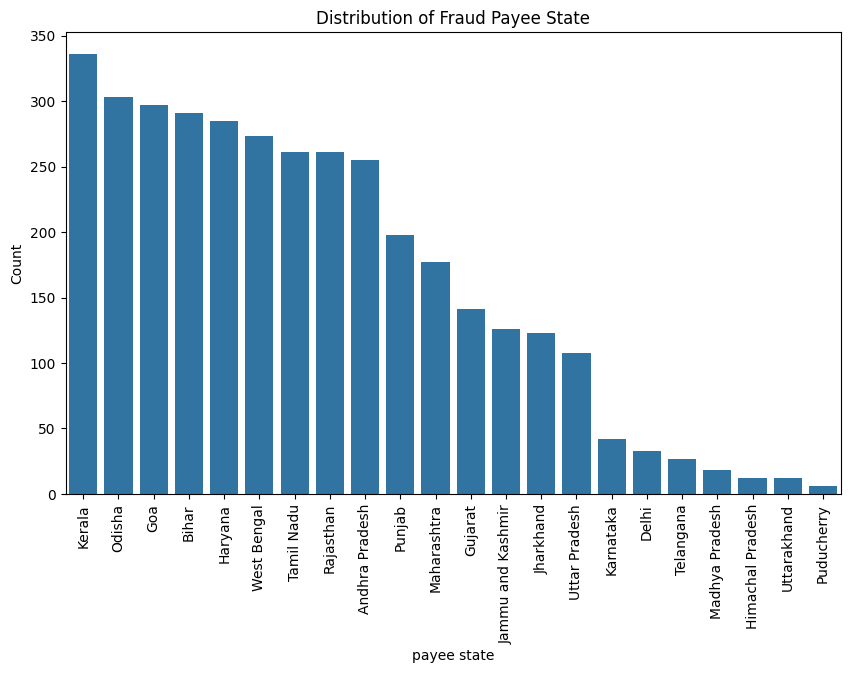

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x=subtype_counts.index,y = subtype_counts.values)
plt.title('Distribution of Fraud Payee State')
plt.xlabel('payee state')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [50]:
# # Create target variable 'is_fraud'
# fraud_labels = ['Fraudulent Transaction']  # Update this list based on your dataset
# data['is_fraud'] = data['txn_subtype'].apply(lambda x: 1 if x in fraud_labels else 0)

# # Drop columns that won't be used in the model
# columns_to_drop = ['txn_id', 'txn_subtype', 'dt_txn_comp', 'txn_comp_time']
# data.drop(columns=columns_to_drop, inplace=True)

# # Handle missing values - Fill missing values in 'error_code' with a placeholder
# data['error_code'].fillna('No Error', inplace=True)

# # Encode categorical variables
# categorical_columns = data.select_dtypes(include=['object']).columns
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     data[col] = le.fit_transform(data[col])
#     label_encoders[col] = le

# # Split the data into features (X) and target (y)
# X = data.drop(columns=['is_fraud'])
# y = data['is_fraud']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the numerical features
# numerical_columns = X.select_dtypes(include=[np.number]).columns
# scaler = StandardScaler()
# X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
# X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# # Train a Random Forest Classifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# # Make predictions on new data
# def predict_fraud(new_data):
#     # Preprocess new data similarly
#     for col in categorical_columns:
#         new_data[col] = label_encoders[col].transform(new_data[col])
#     new_data[numerical_columns] = scaler.transform(new_data[numerical_columns])
#     return model.predict(new_data)

# # Example usage with a single row of new data
# new_data = pd.DataFrame({
#     'txn_type': ['Payment'],
#     'txn_subtype': ['Peer-to-Peer (P2P)'],
#     'initiating_channel_id': [18],
#     'txn_status': ['Successful'],
#     'error_code': ['No Error'],
#     'payer_psp': ['PhonePe'],
#     'payee_psp': ['PhonePe for Merchants'],
#     'remitter_bank': ['State Bank of India (SBI)'],
#     'beneficiary_bank': ['State Bank of India (SBI)'],
#     'payer_handle': ['xyz@upi'],
#     'payer_app': ['PhonePe'],
#     'payee_handle': ['abc@upi'],
#     'payee_app': ['PhonePe for Merchants'],
#     'payee_requested_amount': [500],
#     'payee_settlement_amount': [500],
#     'payer_location': [123456],
#     'payer_city': ['Mumbai'],
#     'payer_state': ['Maharashtra'],
#     'payee_location': [654321],
#     'payee_city': ['Mumbai'],
#     'payee_state': ['Maharashtra'],
#     'payer_os_type': ['Android'],
#     'payee_os_type': ['Android'],
#     'beneficiary_mcc_code': [6011],
#     'remitter_mcc_code': [6011],
#     'custref_transaction_ref': ['Ref123'],
#     'cred_type': ['Credit Card'],
#     'cred_subtype': ['General'],
#     'payer_app_id': ['com.phonepe.app'],
#     'payee_app_id': ['com.phonepe.merchant'],
#     'initiation_mode': [1],
#     'dt_time_txn_compl': ['2023-06-02 08:36:00'],
#     'time_of_day': ['Morning']
# })

# new_data['error_code'].fillna('No Error', inplace=True)
# new_data = new_data[categorical_columns].apply(lambda col: label_encoders[col.name].transform(col))
# new_data[numerical_columns] = scaler.transform(new_data[numerical_columns])
# new_data['error_code'] = 0  # Add this line to set a default value for 'error_code'

# prediction = predict_fraud(new_data)
# print("Prediction:", "Fraudulent" if prediction[0] == 1 else "Not Fraudulent")

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv('//content/drive/MyDrive/data/Fraud Analytics Dataset.csv')

fraud_labels = ['Fraudulent Transaction']  # Update this list based on your dataset
data['is_fraud'] = data['txn_subtype'].apply(lambda x: 1 if x in fraud_labels else 0)

# Drop columns that won't be used in the model
columns_to_drop = ['txn_id', 'txn_subtype', 'dt_txn_comp', 'txn_comp_time']
data.drop(columns=columns_to_drop, inplace=True)

# Handle missing values - Fill missing values in 'error_code' with a placeholder
data['error_code'].fillna('No Error', inplace=True)

# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Impute missing values for numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Split the data into features (X) and target (y)
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Make predictions on new data
def preprocess_new_data(new_data, categorical_columns, label_encoders, numerical_columns, scaler, imputer):
    # Encode categorical columns in new data
    for col in categorical_columns:
        if col in new_data:
            new_data[col] = label_encoders[col].transform(new_data[col])

    # Impute and scale numerical columns in new data
    if not new_data.empty:
        new_data[numerical_columns] = imputer.transform(new_data[numerical_columns])
        new_data[numerical_columns] = scaler.transform(new_data[numerical_columns])

    return new_data

def predict_fraud(new_data):
    # Preprocess new data similarly
    new_data = preprocess_new_data(new_data, categorical_columns, label_encoders, numerical_columns, scaler, imputer)
    return model.predict(new_data)

# Example usage with a single row of new data
new_data = pd.DataFrame({
    'txn_type': ['Payment'],
    'initiating_channel_id': [18],
    'txn_status': ['Successful'],
    'error_code': ['No Error'],
    'payer_psp': ['PhonePe'],
    'payee_psp': ['PhonePe for Merchants'],
    'remitter_bank': ['State Bank of India (SBI)'],
    'beneficiary_bank': ['State Bank of India (SBI)'],
    'payer_handle': ['xyz@upi'],
    'payer_app': ['PhonePe'],
    'payee_handle': ['abc@upi'],
    'payee_app': ['PhonePe for Merchants'],
    'payee_requested_amount': [500],
    'payee_settlement_amount': [500],
    'payer_location': [123456],
    'payer_city': ['Mumbai'],
    'payer_state': ['Maharashtra'],
    'payee_location': [654321],
    'payee_city': ['Mumbai'],
    'payee_state': ['Maharashtra'],
    'payer_os_type': ['Android'],
    'payee_os_type': ['Android'],
    'beneficiary_mcc_code': [6011],
    'remitter_mcc_code': [6011],
    'custref_transaction_ref': ['Ref123'],
    'cred_type': ['Credit Card'],
    'cred_subtype': ['General'],
    'payer_app_id': ['com.phonepe.app'],
    'payee_app_id': ['com.phonepe.merchant'],
    'initiation_mode': [1],
    'dt_time_txn_compl': ['2023-06-02 08:36:00'],
    'time_of_day': ['Morning']
})

# Preprocess and predict
new_data['error_code'].fillna('No Error', inplace=True)
new_data = preprocess_new_data(new_data, categorical_columns, label_encoders, numerical_columns, scaler, imputer)
prediction = model.predict(new_data)
print("Prediction:", "Fraudulent" if prediction[0] == 1 else "Not Fraudulent")



ValueError: Columns must be same length as key